# Introduction
* This kernel is notes that I took for **Machine Learning**. This is not a tutorial you can think that kernel as a cheatsheet for Machine Learning. While coding a kernel open this in a new tab and copy paste.
<img src = "https://www.normshield.com/wp-content/uploads/2017/01/MachineLearningDiagram.png" width = "750" height = "422" />

### This kernel is a part of a big series:
* [Data Science Notes1: Matplotlib](https://www.kaggle.com/mrhippo/data-science-notes1-matplotlib)
* [Data Science Notes2: Seaborn](https://www.kaggle.com/mrhippo/data-science-notes2-seaborn)
* [Data Science Notes3: Plotly](https://www.kaggle.com/mrhippo/data-science-notes3-plotly)
* Data Science Notes4: Machine Learning (ML)
* [Data Science Notes5: Deep Learning: ANN](https://www.kaggle.com/mrhippo/data-science-notes5-deep-learning-ann) 
* [Data Science Notes6: Deep Learning: CNN](https://www.kaggle.com/mrhippo/data-science-notes6-deep-learning-cnn) 
* [Data Science Notes7: Deep Learning: RNN and LSTM](https://www.kaggle.com/mrhippo/data-science-notes7-deep-learning-rnn-and-lstm)

### This kernel will be updated

## Content
* [Imports and Datasets](#1)
* [Regression](#2)
* [Classification](#3)
* [Conclusion](#4)

<a id="1"></a> <br>
# Imports and Datasets

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.gridspec import  GridSpec
import seaborn as sns
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True) 
import warnings
warnings.filterwarnings('ignore')
import pandas_profiling as pp
%matplotlib inline

from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.ensemble import BaggingClassifier, VotingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
data = pd.read_csv("/kaggle/input/students-performance-in-exams/StudentsPerformance.csv")
data.head()

In [ ]:
data.info()

In [ ]:
pp.ProfileReport(data)

In [ ]:
fig, ax = plt.subplots(2,2, figsize = (16,20))

sns.countplot(data["race/ethnicity"],palette = "Blues", ax = ax[0,0])
ax[0,0].set_title("race/ethnicity")

sns.countplot(data["parental level of education"],palette = "Reds", ax = ax[0,1])
ax[0,1].set_title("parental level of education")
ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(),rotation = 25)

sns.countplot(data["lunch"],palette = "Greens", ax = ax[1,0])
ax[1,0].set_title("lunch")

sns.countplot(data["test preparation course"],palette = "Purples", ax = ax[1,1])
ax[1,1].set_title("test preparation course")

plt.show()


<a id="2"></a> <br>
# Regression

In [ ]:
#plt.style.use('default')

x = np.array(data.loc[:,'math score']).reshape(-1,1)
y = np.array(data.loc[:,'reading score']).reshape(-1,1)

fig = plt.figure(figsize = (12,7))
plt.scatter(x = x, y = y)
plt.title("Math Score-Reading Score")
plt.xlabel('Math Score') 
plt.ylabel('Reading Score')
plt.show()

## Linear Regression
* In statistics, linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression.
* Reference: [Wikipedia](https://en.wikipedia.org/wiki/Linear_regression#:~:text=In%20statistics%2C%20linear%20regression%20is,is%20called%20simple%20linear%20regression.)
<img src = "https://i.imgur.com/b7lH8g1.png" width = "750" height = "422" />

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
# Predict space
predict_space = np.linspace(min(x), max(x)).reshape(-1,1)

# Fit
reg.fit(x,y)

# Predict
predicted = reg.predict(predict_space)

# R^2 
print('R^2 score: ',reg.score(x, y))

# Plot regression line and scatter

fig = plt.figure(figsize = (12,7))
plt.plot(predict_space, predicted, color='black', linewidth=3,label = "LR Prediction")
plt.scatter(x=x,y=y,label = "Data")
plt.legend()
plt.xlabel('Math Score') 
plt.ylabel('Reading Score')
plt.grid(True, alpha = 0.5)
plt.title("Linear Regression Math Score-Reading Score")
plt.show()

## Decision Tree Regressor
* Decision tree learning is one of the predictive modelling approaches used in statistics, data mining and machine learning. It uses a decision tree (as a predictive model) to go from observations about an item (represented in the branches) to conclusions about the item's target value (represented in the leaves). Tree models where the target variable can take a discrete set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. Decision trees are among the most popular machine learning algorithms given their intelligibility and simplicity.
* Reference: [Wikipedia](https://en.wikipedia.org/wiki/Decision_tree_learning)
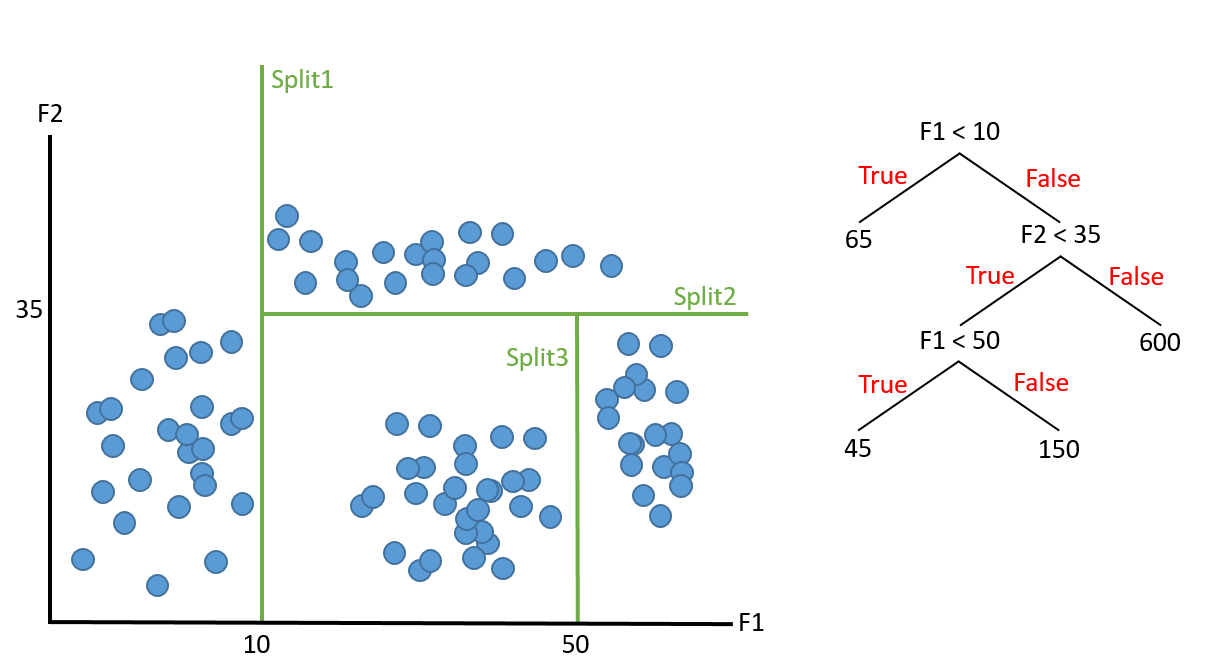

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x,y)

y_head = tree_reg.predict(x)

print('R^2 score: ',tree_reg.score(x, y))

fig = plt.figure(figsize = (12,7))
plt.scatter(x,y, label = "Data")
plt.scatter(x,y_head,color = "red", alpha = 0.5, label = "DT Prediction")
plt.xlabel("Math Score")
plt.ylabel("Reading Score")
plt.grid(True, alpha = 0.5)
plt.title("Decision Tree Regression Math Score-Reading Score")
plt.show()

## Random Forest Regressor
* Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.[1][2] Random decision forests correct for decision trees' habit of overfitting to their training set.
* Reference: [Wikipedia](https://en.wikipedia.org/wiki/Random_forest)
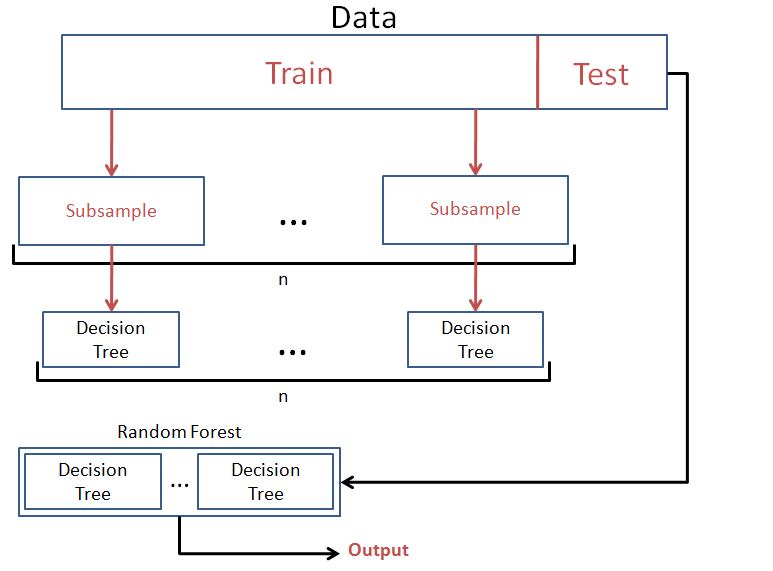

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 30)
rf.fit(x,y)

y_head = rf.predict(x)

print('R^2 score: ',rf.score(x, y))

fig = plt.figure(figsize = (12,7))
plt.scatter(x,y)
plt.scatter(x,y_head,color = "red", alpha = 0.5)
plt.xlabel("Math Score")
plt.ylabel("Reading Score")
plt.grid(True, alpha = 0.5)
plt.title("Random Forest Regression Math Score-Reading Score")
plt.show()

<a id="3"></a> <br>
# Classification

## Preparing Data

In [ ]:
data["gender"] = [1 if each == "female" else 0 for each in data["gender"]] # female = 1, male = 0
gender_data = data["gender"] 
data_without_gender = data.drop(["gender"], axis = 1)
data_without_gender.head()

## One-hot Encoding
* **Oone-hot encoding** is a technique for using **categorical data** in ML.  
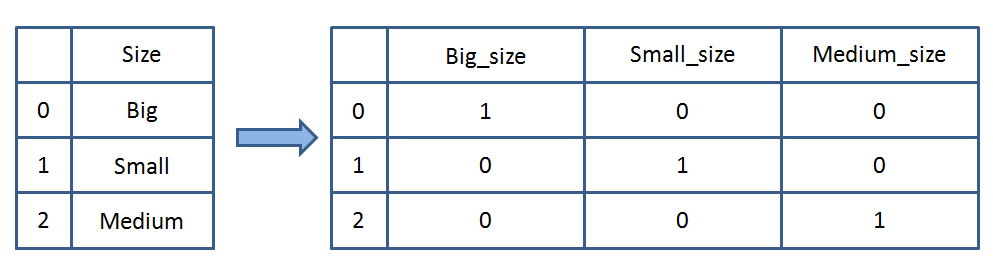

In [ ]:
data_without_gender = pd.get_dummies(data_without_gender)
data_without_gender.head()

In [ ]:
#data = pd.concat([gender_data,data_without_gender],axis = 1) 
#data.head()

In [ ]:
from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(data_without_gender, gender_data,test_size = 0.2, random_state = 42)


## Logistic Regression
* Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression). 
* Reference: [Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression#:~:text=Logistic%20regression%20is%20a%20statistical,a%20form%20of%20binary%20regression).

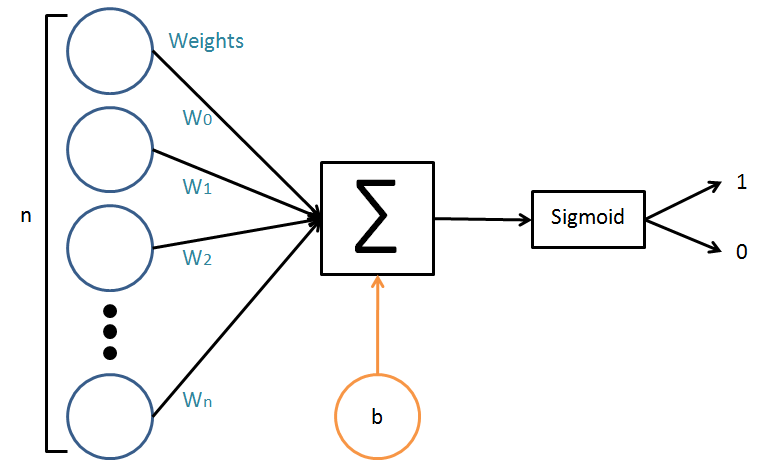

In [ ]:
from sklearn.linear_model import LogisticRegression
#lr = LogisticRegression()
#lr.fit(x_train, y_train)

score_list_lr = []
train_list = []
for i in range(1,10):

    x_train, x_test, y_train, y_test = train_test_split(data_without_gender, gender_data,test_size = i/10, random_state = 42)

    lr = LogisticRegression()
    lr.fit(x_train,y_train) 
    print("Test accuracy: {}/Test Size: {}".format(lr.score(x_test,y_test),i))
    score_list_lr.append(lr.score(x_test,y_test))
    train_list.append(lr.score(x_train,y_train))

fig, ax = plt.subplots(1,2, figsize = (17,6))
gs = fig.add_gridspec(1, 4)

grid = GridSpec(1,4,left=0.1, bottom=0.05, right=1.2, top=0.94, wspace=0.3, hspace=0.3)

ax1 = fig.add_subplot(grid[0:3])
ax2 = fig.add_subplot(grid[3:4])

ax1.plot(range(1,10),score_list_lr,label = "Test Accuracy")
ax1.plot(range(1,10),train_list, label = "Train Accuracy")
ax1.legend(fontsize = 15)
ax1.set_xlabel("Test Sizes")
ax1.set_ylabel("Accuracy")
ax1.set_title("Scores For Each Test Size",fontsize = 17)
ax1.grid(True, alpha = 0.4)

x_train, x_test, y_train, y_test = train_test_split(data_without_gender,gender_data,test_size = (1+score_list_lr.index(np.max(score_list_lr)))/10, random_state = 42)

lr_best = LogisticRegression(random_state = 42)
lr_best = lr_best.fit(x_train, y_train)
y_pred = lr_best.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true,y_pred)

sns.heatmap(cm, annot=True,annot_kws = {"size": 25}, linewidths=0.5, fmt = '.0f', ax=ax2,cmap = "Blues",linecolor = "black")
plt.title("Confusion Matrix",fontsize = 17)
plt.show()

print("Best Accuracy(test): {}/Test Size: {}".format(np.max(score_list_lr),1+score_list_lr.index(np.max(score_list_lr))))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data_without_gender, gender_data,test_size = 0.2, random_state = 42)

## KNN
* In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a non-parametric method proposed by Thomas Cover used for classification and regression.[1] In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression:
* In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.
* In k-NN regression, the output is the property value for the object. This value is the average of the values of k nearest neighbors.
* Reference: [Wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm).

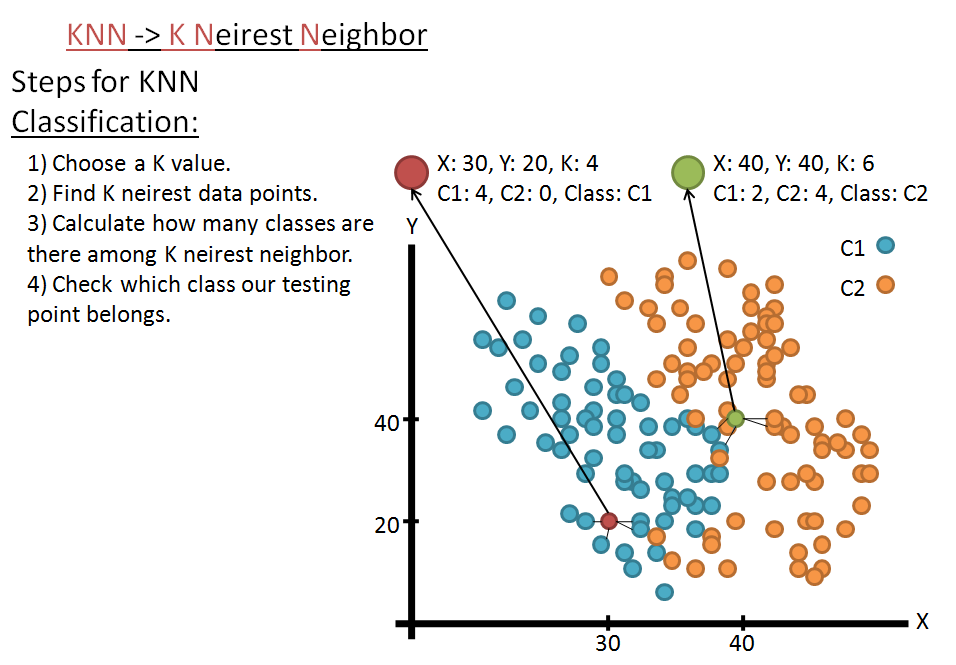

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#knn = KNeighborsClassifier(n_neighbors = 15)
#knn.fit(x_train, y_train)
#print("score: ", knn.score(x_test,y_test))

score_list_knn = []
train_list = []
for each in range(1,25):
    knn = KNeighborsClassifier(n_neighbors = each)
    knn.fit(x_train,y_train)
    print("test accuracy: {}/Neighbors: {}".format(knn.score(x_test,y_test),each))
    score_list_knn.append(knn.score(x_test,y_test))
    train_list.append(knn.score(x_train,y_train))

fig, ax = plt.subplots(1,2, figsize = (17,6))
gs = fig.add_gridspec(1, 4)

grid = GridSpec(1,4,left=0.1, bottom=0.05, right=1.2, top=0.94, wspace=0.3, hspace=0.3)

ax1 = fig.add_subplot(grid[0:3])
ax2 = fig.add_subplot(grid[3:4])    

ax1.plot(range(1,25),score_list_knn, label = "Test Accuracy")
ax1.plot(range(1,25),train_list,c = "orange", label = "Train Accuracy")
ax1.legend(fontsize = 15)
ax1.set_xlabel("K Values")
ax1.set_ylabel("Accuracy")
ax1.set_title("Scores For Each K Value",fontsize = 17)
ax1.grid(True , alpha = 0.4)

knn_best = KNeighborsClassifier(n_neighbors = 1+score_list_knn.index(np.max(score_list_knn)))
knn_best = knn_best.fit(x_train, y_train)
y_pred = knn_best.predict(x_test)
y_true = y_test

cm = confusion_matrix(y_true,y_pred)

sns.heatmap(cm, annot=True,annot_kws = {"size": 25}, linewidths=0.5, fmt = '.0f', ax=ax2,cmap = "Blues",linecolor = "black")
plt.title("Confusion Matrix",fontsize = 17)
plt.show()

print("Best Accuracy(test): {}/Neighbors: {}".format(np.max(score_list_knn),1+score_list_knn.index(np.max(score_list_knn))))

## SVM
* In machine learning, support-vector machines (SVMs, also support-vector networks[1]) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. The Support Vector Machine (SVM) algorithm is a popular machine learning tool that offers solutions for both classification and regression problems. Developed at AT&T Bell Laboratories by Vapnik with colleagues (Boser et al., 1992, Guyon et al., 1993, Vapnik et al., 1997), it presents one of the most robust prediction methods, based on the statistical learning framework or VC theory proposed by Vapnik and Chervonekis (1974) and Vapnik (1982, 1995). 
* Reference: [Wikipedia](https://en.wikipedia.org/wiki/Support_vector_machine)
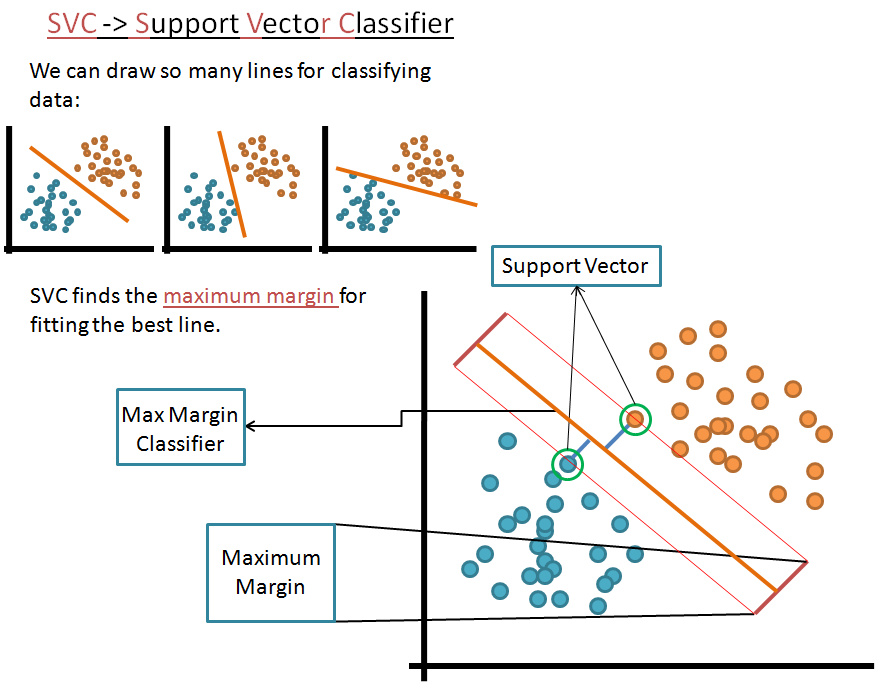

In [ ]:
from sklearn.svm import SVC
#svm = SVC()
#svm.fit(x_train,y_train)

#print("accuracy: ",svm.score(x_test,y_test))

score_list_svm = []
train_list = []
for each in range(100,500,50):
    svm = SVC(cache_size = each )
    svm.fit(x_train,y_train)
    print("test accuracy: {}/Cache Size: {}".format(svm.score(x_test,y_test),each))
    score_list_svm.append(svm.score(x_test,y_test))
    train_list.append(svm.score(x_train,y_train))

fig, ax = plt.subplots(1,2, figsize = (17,6))
gs = fig.add_gridspec(1, 4)

grid = GridSpec(1,4,left=0.1, bottom=0.05, right=1.2, top=0.94, wspace=0.3, hspace=0.3)

ax1 = fig.add_subplot(grid[0:3])
ax2 = fig.add_subplot(grid[3:4])  
    
ax1.plot(range(100,500,50),score_list_svm, label = "Test Accuracy")
ax1.plot(range(100,500,50),train_list,c = "orange", label = "Train Accuracy")
ax1.legend(fontsize = 15)
ax1.set_xlabel("Cache Sizes")
ax1.set_ylabel("Accuracy")
ax1.set_title("Scores For Each Cache Size",fontsize = 17)
ax1.grid(True , alpha = 0.4)

svm_best = SVC(cache_size = 50*(1+score_list_svm.index(np.max(score_list_svm))))
svm_best = svm_best.fit(x_train, y_train)
y_pred = svm_best.predict(x_test)
y_true = y_test

cm = confusion_matrix(y_true,y_pred)

sns.heatmap(cm, annot=True,annot_kws = {"size": 25}, linewidths=0.5, fmt = '.0f', ax=ax2,cmap = "Blues",linecolor = "black")
plt.title("Confusion Matrix",fontsize = 17)
plt.show()

print("Best Accuracy(test): {}/Cache Size: {}".format(np.max(score_list_svm),50+50*(1+score_list_svm.index(np.max(score_list_svm)))))

## GaussianNB
* In statistics, Naïve Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naïve) independence assumptions between the features. They are among the simplest Bayesian network models.[1] But they could be coupled with Kernel density estimation and achieve higher accuracy levels.
* Naïve Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features/predictors) in a learning problem. Maximum-likelihood training can be done by evaluating a closed-form expression,[4]:718 which takes linear time, rather than by expensive iterative approximation as used for many other types of classifiers.
* Reference: [Wikipedia](https://en.wikipedia.org/wiki/Naive_Bayes_classifier)

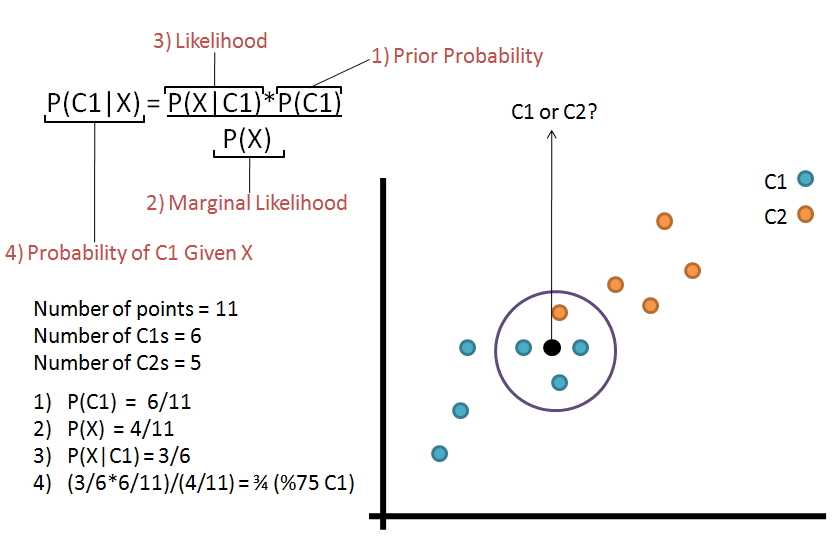

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train,y_train)

print("Test Accuracy: ",nb.score(x_test,y_test))

y_pred = nb.predict(x_test)
y_true = y_test

cm = confusion_matrix(y_true,y_pred)

plt.figure(figsize = (10,10))
sns.heatmap(cm, annot=True,annot_kws = {"size": 25}, linewidths=0.5, fmt = '.0f',cmap = "Blues",linecolor = "black")
plt.title("Confusion Matrix",fontsize = 17)
plt.show()

## Decision Tree
* A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.
* Decision trees are commonly used in operations research, specifically in decision analysis, to help identify a strategy most likely to reach a goal, but are also a popular tool in machine learning.
* Reference: [Wikipedia](https://en.wikipedia.org/wiki/Decision_tree)

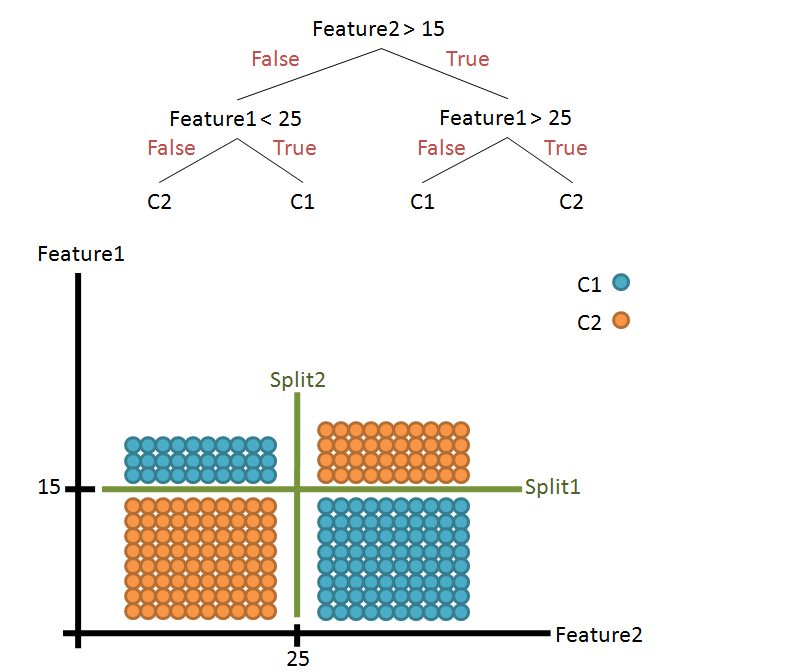

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#dt = DecisionTreeClassifier()
#dt.fit(x_train,y_train)

#print("accuracy: ",dt.score(x_test,y_test))

score_list_dt = []
train_list = []
for d in range(1,10):
    clf = DecisionTreeClassifier(max_depth = d,random_state = 42)
    clf = clf.fit(x_train, y_train)
    print("Test accuracy: {}/Max Depth: {}".format(clf.score(x_test,y_test),d))
    score_list_dt.append(clf.score(x_test,y_test))
    train_list.append(clf.score(x_train,y_train))
    
fig, ax = plt.subplots(1,2, figsize = (17,6))
gs = fig.add_gridspec(1, 4)

grid = GridSpec(1,4,left=0.1, bottom=0.05, right=1.2, top=0.94, wspace=0.3, hspace=0.3)

ax1 = fig.add_subplot(grid[0:3])
ax2 = fig.add_subplot(grid[3:4])  
    
ax1.plot(range(1,10),score_list_dt,label = "Test Score")
ax1.plot(range(1,10),train_list,label = "Train Score")
ax1.legend(fontsize = 15)
ax1.set_xlabel("Max Depth")
ax1.set_ylabel("Accuracy")
ax1.grid(True, alpha = 0.5)
ax1.set_title("Accuricies for each Max Depth Value",fontsize = 17)

dt_best = DecisionTreeClassifier(max_depth = 1+score_list_dt.index(np.max(score_list_dt)))
dt_best = dt_best.fit(x_train, y_train)
y_pred = dt_best.predict(x_test)
y_true = y_test

cm = confusion_matrix(y_true,y_pred)

sns.heatmap(cm, annot=True,annot_kws = {"size": 25}, linewidths=0.5, fmt = '.0f', ax=ax2,cmap = "Blues",linecolor = "black")
plt.title("Confusion Matrix",fontsize = 17)
plt.show()

print("Best Accuracy: {}/Max Depth: {}".format(np.max(score_list_dt),1+score_list_dt.index(np.max(score_list_dt))))

## Random Forest
* Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression)
* Reference: [Wikipedia](https://en.wikipedia.org/wiki/Random_forest#:~:text=Random%20forests%20or%20random%20decision,prediction%20(regression)%20of%20the%20individual)
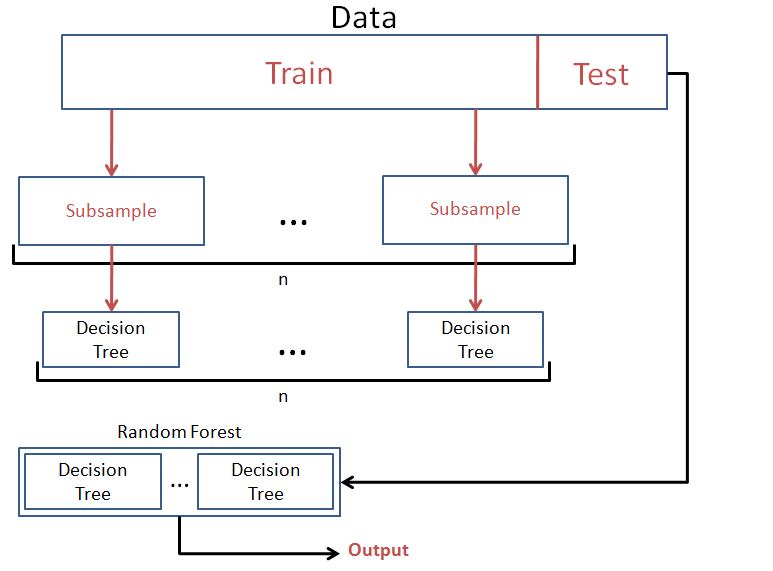


In [ ]:
from sklearn.ensemble import RandomForestClassifier
#rf = RandomForestClassifier(n_estimators = 200)
#rf.fit(x_train, y_train)

#print("accuracy: ",rf.score(x_test,y_test))

score_list_rf = []
train_list = []
for i in range(20,160,20):
    rf = RandomForestClassifier(n_estimators = i, random_state = 42) #100
    rf.fit(x_train,y_train)
    print("Test Score: {}/Number of Estimators: {} ".format(rf.score(x_test,y_test),i))
    score_list_rf.append(rf.score(x_test,y_test))
    train_list.append(rf.score(x_train,y_train))

fig, ax = plt.subplots(1,2, figsize = (17,6))
gs = fig.add_gridspec(1, 4)

grid = GridSpec(1,4,left=0.1, bottom=0.05, right=1.2, top=0.94, wspace=0.3, hspace=0.3)

ax1 = fig.add_subplot(grid[0:3])
ax2 = fig.add_subplot(grid[3:4])  

ax1.plot(range(20,160,20),score_list_rf,label = "Test Accuracy")
ax1.plot(range(20,160,20),train_list,label = "Train Accuracy")
ax1.legend(fontsize = 15)
ax1.set_xlabel("N Estimators")
ax1.set_ylabel("Accuracy")
ax1.set_title("Scores for each N Estimator",fontsize = 17)
ax1.grid(True, alpha=0.5)

rf_best = RandomForestClassifier(n_estimators = 20*(1+score_list_rf.index(np.max(score_list_rf))))
rf_best = rf_best.fit(x_train, y_train)
y_pred = rf_best.predict(x_test)
y_true = y_test

cm = confusion_matrix(y_true,y_pred)

sns.heatmap(cm, annot=True,annot_kws = {"size": 25}, linewidths=0.5, fmt = '.0f', ax=ax2,cmap = "Blues",linecolor = "black")
plt.title("Confusion Matrix",fontsize = 17)
plt.show()

print("Best Accuracy: {}/Max Depth: {}".format(np.max(score_list_rf),20*(1+score_list_rf.index(np.max(score_list_rf)))))

## Perceptron
* In machine learning, the perceptron is an algorithm for supervised learning of binary classifiers. A binary classifier is a function which can decide whether or not an input, represented by a vector of numbers, belongs to some specific class.[1] It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector.
* Reference: [Wikipedia](https://en.wikipedia.org/wiki/Perceptron)
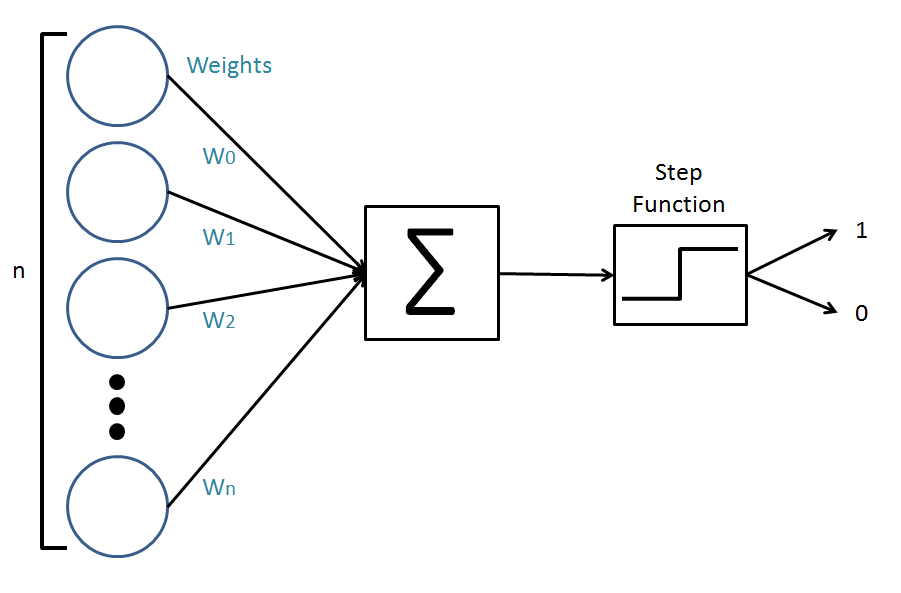

In [ ]:
from sklearn.linear_model import Perceptron
#perceptron = Perceptron()
#perceptron.fit(x_train,y_train)

#print("accuracy: ",perceptron.score(x_test,y_test))

score_list_per = []
train_list = []
for i in np.arange(0.0001, 0.001, 0.0001):
    perceptron = Perceptron(alpha = i, random_state = 42) 
    perceptron.fit(x_train,y_train)
    print("Test Score: {}/Alpha: {} ".format(perceptron.score(x_test,y_test),np.round(i,5)))
    score_list_per.append(perceptron.score(x_test,y_test))
    train_list.append(perceptron.score(x_train,y_train))

fig, ax = plt.subplots(1,2, figsize = (17,6))
gs = fig.add_gridspec(1, 4)

grid = GridSpec(1,4,left=0.1, bottom=0.05, right=1.2, top=0.94, wspace=0.3, hspace=0.3)

ax1 = fig.add_subplot(grid[0:3])
ax2 = fig.add_subplot(grid[3:4])      

ax1.plot(np.arange(0.0001,0.001, 0.0001),score_list_per,label = "Test Accuracy")
ax1.plot(np.arange(0.0001,0.001, 0.0001),train_list,label = "Train Accuracy")
ax1.legend(fontsize = 15)
ax1.set_xlabel("Alphas")
ax1.set_ylabel("Accuracy")
ax1.set_title("Scores for each Alpha",fontsize = 17)
ax1.grid(True, alpha=0.5)    

per_best = Perceptron(alpha = 0.0001+0.0001*(1+score_list_per.index(np.max(score_list_per))))
per_best = per_best.fit(x_train, y_train)
y_pred = per_best.predict(x_test)
y_true = y_test

cm = confusion_matrix(y_true,y_pred)

sns.heatmap(cm, annot=True,annot_kws = {"size": 25}, linewidths=0.5, fmt = '.0f', ax=ax2,cmap = "Blues",linecolor = "black")
plt.title("Confusion Matrix",fontsize = 17)
plt.show()

print("Best Accuracy: {}/Alpha: {}".format(np.max(score_list_per),0.0001*(1+score_list_per.index(np.max(score_list_per)))))

## Stochastic Gradient Descent (SGD)
* Stochastic gradient descent (often abbreviated SGD) is an iterative method for optimizing an objective function with suitable smoothness properties (e.g. differentiable or subdifferentiable). It can be regarded as a stochastic approximation of gradient descent optimization, since it replaces the actual gradient (calculated from the entire data set) by an estimate thereof (calculated from a randomly selected subset of the data). Especially in high-dimensional optimization problems this reduces the computational burden, achieving faster iterations in trade for a lower convergence rate.
* While the basic idea behind stochastic approximation can be traced back to the Robbins–Monro algorithm of the 1950s, stochastic gradient descent has become an important optimization method in machine learning.
* Reference: [Wikipedia](https://en.wikipedia.org/wiki/Stochastic_gradient_descent)

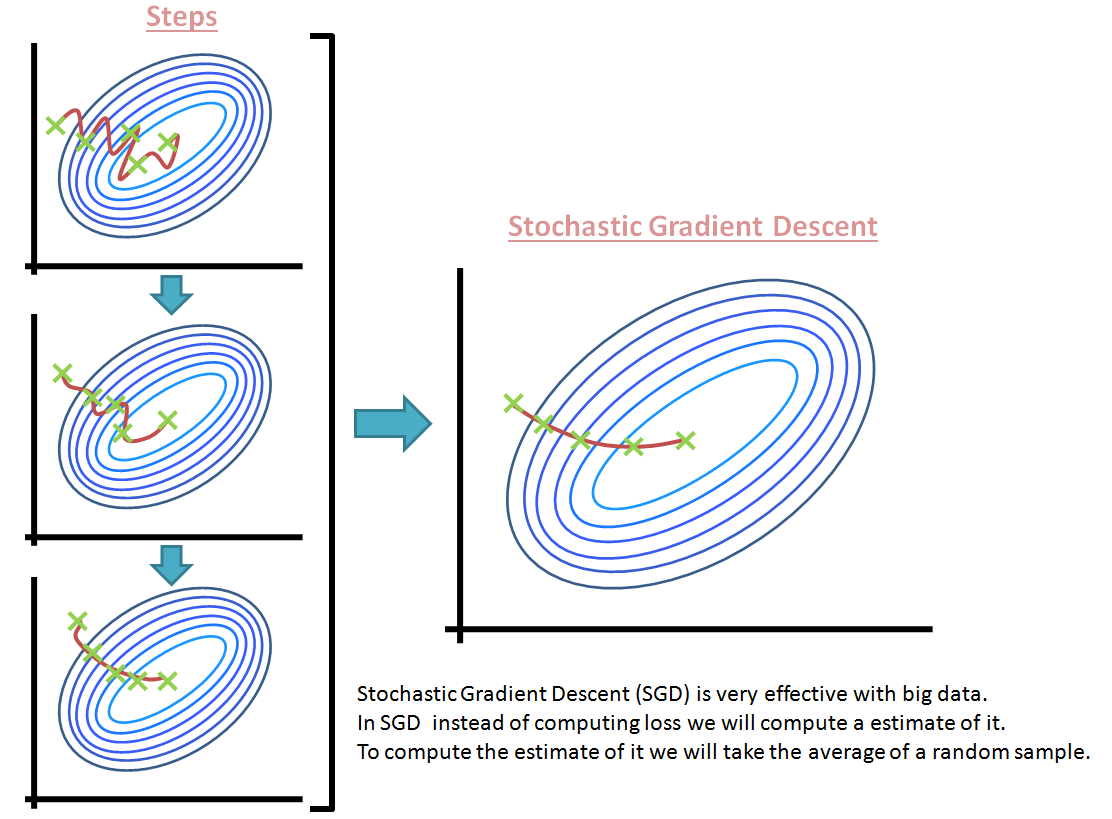

In [ ]:
from sklearn.linear_model import SGDClassifier
#sgd = SGDClassifier()
#sgd.fit(x_train,y_train)

#print("accuracy: ",sgd.score(x_test, y_test))

score_list_sgd = []
train_list = []
for i in np.arange(0.05, 0.3, 0.02):
    sgd = SGDClassifier(epsilon = i, random_state = 42) 
    sgd.fit(x_train,y_train)
    print("Test Score: {}/Epsilon: {} ".format(sgd.score(x_test,y_test),np.round(i,4)))
    score_list_sgd.append(sgd.score(x_test,y_test))
    train_list.append(sgd.score(x_train,y_train))

fig, ax = plt.subplots(1,2, figsize = (17,6))
gs = fig.add_gridspec(1, 4)

grid = GridSpec(1,4,left=0.1, bottom=0.05, right=1.2, top=0.94, wspace=0.3, hspace=0.3)

ax1 = fig.add_subplot(grid[0:3])
ax2 = fig.add_subplot(grid[3:4])    

ax1.plot(np.arange(0.05, 0.3, 0.02),score_list_sgd,label = "Test Accuracy")
ax1.plot(np.arange(0.05, 0.3, 0.02),train_list,label = "Train Accuracy")
ax1.legend(fontsize = 15)
ax1.set_xlabel("Epsilons")
ax1.set_ylabel("Accuracy")
ax1.set_title("Scores for each Epsilon", fontsize = 17)
ax1.grid(True, alpha=0.5)

sgd_best = SGDClassifier(epsilon = 0.03+0.02*(1+score_list_sgd.index(np.max(score_list_sgd))))
sgd_best = sgd_best.fit(x_train, y_train)
y_pred = sgd_best.predict(x_test)
y_true = y_test

cm = confusion_matrix(y_true,y_pred)

sns.heatmap(cm, annot=True,annot_kws = {"size": 25}, linewidths=0.5, fmt = '.0f', ax=ax2,cmap = "Blues",linecolor = "black")
plt.title("Confusion Matrix",fontsize = 17)
plt.show()

print("Best Accuracy: {}/Epsilon: {}".format(np.max(score_list_sgd),0.03+0.02*(1+score_list_sgd.index(np.max(score_list_sgd)))))

## Ridge Regression

In [ ]:
from sklearn.linear_model import RidgeClassifier
#ridge = RidgeClassifier()
#ridge.fit(x_train, y_train)

#print("accuracy: ",ridge.score(x_test,y_test))

score_list_ridge = []
train_list = []
for i in np.arange(0.0005, 0.003, 0.0005):
    ridge = RidgeClassifier(tol = i, random_state = 42) 
    ridge.fit(x_train,y_train)
    print("Test Score: {}/Tol: {} ".format(ridge.score(x_test,y_test),np.round(i,4)))
    score_list_ridge.append(ridge.score(x_test,y_test))
    train_list.append(ridge.score(x_train,y_train))

fig, ax = plt.subplots(1,2, figsize = (17,6))
gs = fig.add_gridspec(1, 4)

grid = GridSpec(1,4,left=0.1, bottom=0.05, right=1.2, top=0.94, wspace=0.3, hspace=0.3)

ax1 = fig.add_subplot(grid[0:3])
ax2 = fig.add_subplot(grid[3:4])  

ax1.plot(np.arange(0.0005, 0.003, 0.0005),score_list_ridge,label = "Test Accuracy")
ax1.plot(np.arange(0.0005, 0.003, 0.0005),train_list,label = "Train Accuracy")
ax1.legend(fontsize = 15)
ax1.set_xlabel("Tols")
ax1.set_ylabel("Accuracy")
ax1.set_title("Scores for each Tol",fontsize = 17)
ax1.grid(True, alpha=0.5)

rid_best = RidgeClassifier(tol = 0.0005*(1+score_list_ridge.index(np.max(score_list_ridge))))
rid_best = rid_best.fit(x_train, y_train)
y_pred = rid_best.predict(x_test)
y_true = y_test

cm = confusion_matrix(y_true,y_pred)

sns.heatmap(cm, annot=True,annot_kws = {"size": 25}, linewidths=0.5, fmt = '.0f', ax=ax2,cmap = "Blues",linecolor = "black")
plt.title("Confusion Matrix",fontsize = 17)
plt.show()

print("Best Accuracy: {}/Tol: {}".format(np.max(score_list_ridge),0.0005*(1+score_list_ridge.index(np.max(score_list_ridge)))))

## Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

score_list_lasso = []
train_list = []
for i in np.arange(0.2, 1.4, 0.2):
    lasso = Lasso(alpha = i, random_state = 42) 
    lasso.fit(x_train,y_train)
    print("Test Score: {}/Alpha: {} ".format(lasso.score(x_test,y_test),np.round(i,4)))
    score_list_lasso.append(lasso.score(x_test,y_test))
    train_list.append(lasso.score(x_train,y_train))

fig, ax = plt.subplots(1,2, figsize = (17,6))
gs = fig.add_gridspec(1, 4)

grid = GridSpec(1,4,left=0.1, bottom=0.05, right=1.2, top=0.94, wspace=0.3, hspace=0.3)

ax1 = fig.add_subplot(grid[0:3])
ax2 = fig.add_subplot(grid[3:4])  

ax1.plot(np.arange(0.2, 1.4, 0.2),score_list_lasso,label = "Test Accuracy")
ax1.plot(np.arange(0.2, 1.4, 0.2),train_list,label = "Train Accuracy")
ax1.legend(fontsize = 15)
ax1.set_xlabel("Alphas")
ax1.set_ylabel("Accuracy")
ax1.set_title("Scores for each Alpha",fontsize = 17)
ax1.grid(True, alpha=0.5)

las_best = Lasso(alpha = 0.2*(1+score_list_lasso.index(np.max(score_list_lasso))))
las_best = las_best.fit(x_train, y_train)
y_pred = las_best.predict(x_test)
y_true = y_test

cm = confusion_matrix(y_true,y_pred)

sns.heatmap(cm, annot=True,annot_kws = {"size": 25}, linewidths=0.5, fmt = '.0f', ax=ax2,cmap = "Blues",linecolor = "black")
plt.title("Confusion Matrix",fontsize = 17)
plt.show()

print("Best Accuracy: {}/Alpha: {}".format(np.max(score_list_lasso),0.2*(1+score_list_lasso.index(np.max(score_list_lasso)))))

In [ ]:
dict_models = {"Models":["Logistic Regression",
                       "KNN",
                       "SVC",
                       "GaussianNB",
                       "Decision Tree",
                       "Random Forest",
                       "Perceptron",
                       "Sthocastic Gradient Descent",
                       "Ridge"],
             "Scores":[np.max(score_list_lr).round(3),
                       np.max(score_list_knn).round(3),
                       np.max(score_list_svm).round(3),
                       nb.score(x_test,y_test),
                       np.max(score_list_dt).round(3),
                       np.max(score_list_rf).round(3),
                       np.max(score_list_per).round(3),
                       np.max(score_list_sgd).round(3),
                       np.max(score_list_ridge).round(3)]}

df_scores_models = pd.DataFrame(data=dict_models)
df_scores_models = df_scores_models.sort_values(by = ["Scores"])
df_scores_models.head(len(df_scores_models)) 

In [ ]:
trace1 = go.Bar(
    x = df_scores_models["Models"],
    y = df_scores_models["Scores"],
    text = df_scores_models["Scores"],
    textposition = "auto",
    marker=dict(color = df_scores_models["Scores"],colorbar=dict(
            title="Colorbar"
        ),colorscale="Viridis",))

data = [trace1]
layout = go.Layout(title = "Comparison of Models",template = "plotly_white")

fig = go.Figure(data = data, layout = layout)
fig.update_xaxes(title_text = "Names")
fig.update_yaxes(title_text = "Scores")
fig.show()

<a id="4"></a> <br>
# Conclusion
* **If there is something wrong with this kernel please let me know in the comments.**

### My other kernels: https://www.kaggle.com/mrhippo/notebooks

* **References:**
* https://www.youtube.com/watch?v=hMLUgM6kTp8